In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 



t = np.linspace(0, 2, 30)**2
y1 = np.sin(t)
y2 = np.cos(1.3*t)
y3 = np.heaviside(t-1, 0)

y = np.vstack((y1, y2, y3)).T
t = t[:, None]

print(y.shape)



(30, 3)


In [ ]:
N_timepoints = y.shape[0]
N_signals = y.shape[1]
I_crit = np.zeros(N_timepoints, dtype=bool)

I_crit[0] = True
I_crit[-1] = True

I_last_point = 0


def get_distances(t1, y1, t2, y2, tn, yn):
    m = (y2-y1) / (t2 - t1)
    #print(m, tn, t1, t2, y1)
    y_fit = m * (tn - t1) + y1
    error = y_fit - yn
    return error
     

for i in range(1, N_timepoints):
    t1 = t[I_last_point]
    y1 = y[[I_last_point], :]
    t2 = t[i]
    y2 = y[[i], :]    
    tn = t[I_last_point+1:i+1]
    yn = y[I_last_point+1:i+1, :]
    error = get_distances(t1, y1, t2, y2, tn, yn)

    if np.any(np.abs(error) > 0.3):
        I_last_point = i-1
        I_crit[I_last_point] = True

I_crit

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True])

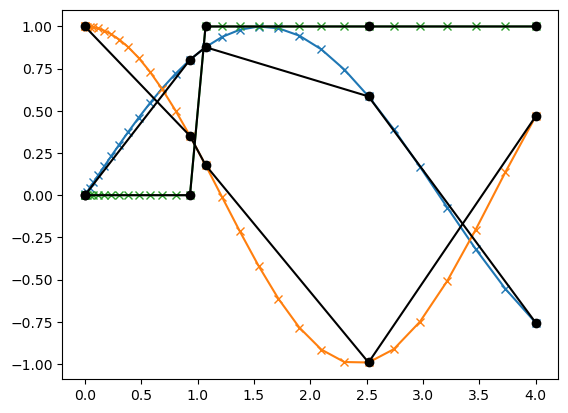

In [62]:
fig, ax = plt.subplots()    

ax.plot(t, y, marker = 'x')
ax.plot(t[I_crit], y[I_crit], marker = 'o', color = 'k')